In [21]:
#Se importan librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('fivethirtyeight')

In [2]:
#Data 

vacunas = pd.read_csv('/Users/rodolfopardo/Downloads/vacunas_covid_new.csv')

#Tiene como fuente el Ministerio de salud de la Nación

#### Exploración de nuestros datos

In [6]:
#Dimensiones

print('Esta base de datos contiene {} filas como {} columnas.'.format(vacunas.shape[0], vacunas.shape[1]))

Esta base de datos contiene 6433141 filas como 15 columnas.


In [7]:
#Tipos de datos

vacunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433141 entries, 0 to 6433140
Data columns (total 15 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   sexo                        object
 1   grupo_etario                object
 2   jurisdiccion_residencia     object
 3   jurisdiccion_residencia_id  int64 
 4   depto_residencia            object
 5   depto_residencia_id         int64 
 6   jurisdiccion_aplicacion     object
 7   jurisdiccion_aplicacion_id  int64 
 8   depto_aplicacion            object
 9   depto_aplicacion_id         int64 
 10  fecha_aplicacion            object
 11  vacuna                      object
 12  condicion_aplicacion        object
 13  orden_dosis                 int64 
 14  lote_vacuna                 object
dtypes: int64(5), object(10)
memory usage: 736.2+ MB


In [8]:
#Primeros valores de nuestro dataframe

vacunas.head()

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,M,60-69,Mendoza,50,Luján de Cuyo,63,Mendoza,50,Luján de Cuyo,63,2021-04-06,Sputnik,>60,1,I-250321
1,M,60-69,Mendoza,50,Luján de Cuyo,63,Mendoza,50,Luján de Cuyo,63,2021-04-09,Sputnik,>60,1,I-340321
2,M,18-29,Salta,66,Capital,28,Salta,66,Capital,28,2021-02-22,Sputnik,Salud,1,I-080121
3,M,18-29,Salta,66,Capital,28,Salta,66,Capital,28,2021-04-07,Sputnik,Salud,2,II-090221
4,M,40-49,Corrientes,18,General Alvear,56,Corrientes,18,General Alvear,56,2021-02-22,COVISHIELD,Salud,1,4120Z023


In [9]:
#Ultimos valores de nuestro dataframe

vacunas.tail()

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
6433136,F,80-89,Mendoza,50,Maipú,70,Mendoza,50,Maipú,70,2021-03-29,Sputnik,>60,1,I-220321
6433137,F,70-79,Mendoza,50,Guaymallén,28,Mendoza,50,Luján de Cuyo,63,2021-03-31,Sputnik,>60,1,I-250321
6433138,F,60-69,Santiago del Estero,86,Capital,49,Santiago del Estero,86,Capital,49,2021-03-31,Sputnik,>60,1,I-210321
6433139,M,70-79,Misiones,54,Iguazú,63,Misiones,54,Iguazú,63,2021-03-30,Sputnik,>60,1,I-060121
6433140,F,40-49,Buenos Aires,6,San Miguel,760,Buenos Aires,6,José C. Paz,412,2021-03-31,Sputnik,Estratégico,1,I-220321


In [12]:
vacunas.jurisdiccion_aplicacion.value_counts().to_csv('Aplicaciones_por_provincia.csv')

#### Comenzando a filtrar nuestra base por Mendoza

In [13]:
#Filtrando 

vacunas_mdz = vacunas.loc[vacunas['jurisdiccion_aplicacion'] == "Mendoza", ['sexo', 'grupo_etario', 
                                                                           'jurisdiccion_residencia',
                                                                           'depto_aplicacion',
                                                                            'fecha_aplicacion',
                                                                           'vacuna',
                                                                           'condicion_aplicacion',
                                                                            'orden_dosis'
                                                                           ]]

In [14]:
vacunas_mdz.shape

(245489, 8)

In [15]:
#Verificando que tenemos nuestros datos en Mendoza

vacunas_mdz.head()

,sexo,grupo_etario,jurisdiccion_residencia,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
0,M,60-69,Mendoza,Luján de Cuyo,2021-04-06,Sputnik,>60,1
1,M,60-69,Mendoza,Luján de Cuyo,2021-04-09,Sputnik,>60,1
9,M,40-49,Mendoza,San Rafael,2021-04-09,Sinopharm,Salud,1
10,M,60-69,Mendoza,Guaymallén,2021-04-08,Sputnik,>60,1
11,M,60-69,Mendoza,Guaymallén,2021-04-14,Sinopharm,>60,1


In [18]:
#Verificando si tenemos datos actualizados al día de ayer 

vacunas_mdz[vacunas_mdz['fecha_aplicacion'] == "2021-04-19"].count()

sexo                       3006
grupo_etario               3006
jurisdiccion_residencia    3006
depto_aplicacion           3006
fecha_aplicacion           3006
vacuna                     3006
condicion_aplicacion       3006
orden_dosis                3006
dtype: int64

Tenemos 2994 correspondientes al día de ayer en Mendoza. <font color = green><strong>La base de datos está actualizada</strong></font>

In [19]:
#Corregimos fecha para poder jugar con dicha variable 

vacunas_mdz['fecha_aplicacion'] = pd.to_datetime(vacunas_mdz['fecha_aplicacion'], format = "%Y-%m-%d")

#### Visualizando datos

<p><font color= blue>Vacunas aplicadas por día</font></p>

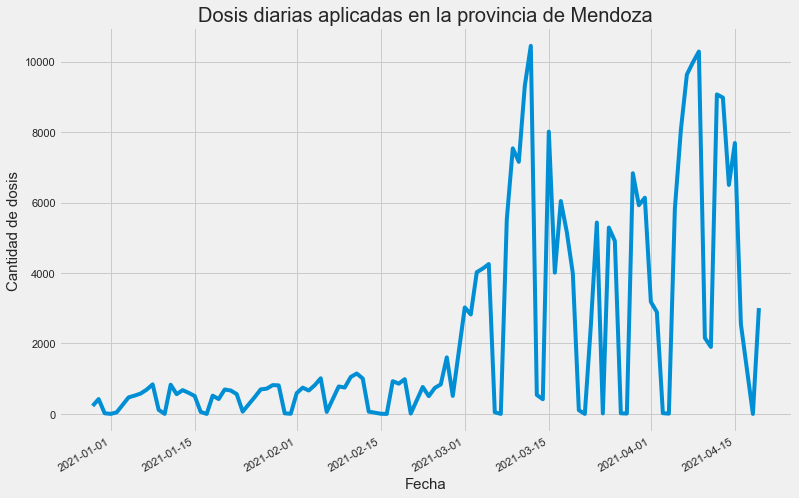

<Figure size 842.4x595.44 with 0 Axes>

In [23]:
x = vacunas_mdz.groupby('fecha_aplicacion')['orden_dosis'].count().plot()
plt.title('Dosis diarias aplicadas en la provincia de Mendoza', fontsize = 20)
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Cantidad de dosis', fontsize = 15)
plt.show()
plt.savefig('vacunas_aplicadas_por_fecha.png')

<p><font color= blue>Dosis aplicadas por departamento</font></p>

[]

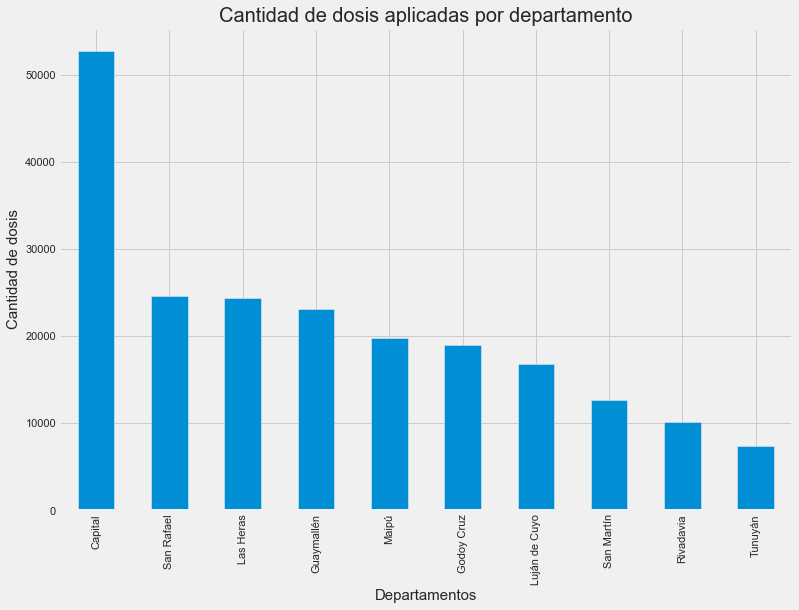

In [24]:
vacunas_mdz.groupby('depto_aplicacion')['orden_dosis'].count().sort_values(ascending = False).head(10).plot.bar()
plt.title('Cantidad de dosis aplicadas por departamento', fontsize = 20)
plt.xlabel('Departamentos', fontsize = 15)
plt.ylabel('Cantidad de dosis', fontsize = 15)
plt.plot()

In [30]:
vacunas_mdz['depto_aplicacion'].value_counts().to_csv('dosis_depto.csv')

<p><font color= blue>Tipo de dosis aplicada por departamento</font></p>

In [33]:
vacunas_mdz['vacuna'].value_counts(normalize = True)

Sputnik        0.640212
Sinopharm      0.233098
COVISHIELD     0.090134
AstraZeneca    0.036556
Name: vacuna, dtype: float64

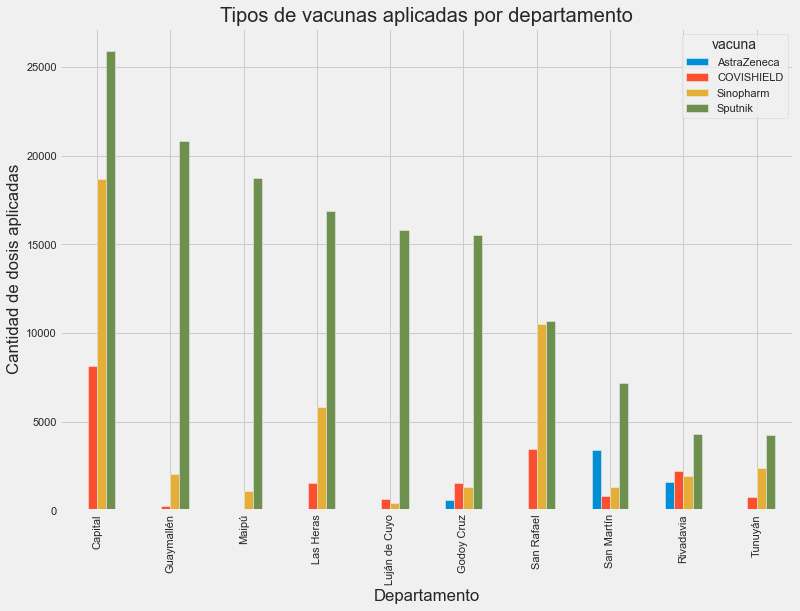

In [31]:
vacunas_mdz.groupby(['depto_aplicacion', 'vacuna']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "Sputnik").head(10).plot.bar()
plt.title('Tipos de vacunas aplicadas por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de dosis aplicadas')
plt.show()

In [34]:
vacunas_mdz.groupby(['depto_aplicacion', 'vacuna']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "Sputnik").head(18)


vacuna,AstraZeneca,COVISHIELD,Sinopharm,Sputnik
depto_aplicacion,,,,
Capital,0,8148,18708,25913
Guaymallén,0,240,2055,20847
Maipú,0,2,1104,18737
Las Heras,54,1567,5848,16889
Luján de Cuyo,0,612,402,15810
Godoy Cruz,557,1554,1312,15546
San Rafael,0,3486,10495,10667
San Martín,3394,814,1336,7169
Rivadavia,1601,2242,1962,4333


<p><font color= blue>Género de población vacunada por departamento</font></p>

In [36]:
#Ordenado por mujeres

vacunas_mdz.groupby(['depto_aplicacion', 'sexo']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "F").head(18)

sexo,F,M,S.I.
depto_aplicacion,,,
Capital,34251,18151,367
San Rafael,14753,9775,120
Las Heras,14178,10025,155
Guaymallén,13841,9140,161
Godoy Cruz,11466,7359,144
Maipú,11349,8382,112
Luján de Cuyo,9303,7405,116
San Martín,7403,5263,47
Rivadavia,5968,4103,67


In [37]:
vacunas_mdz.groupby(['depto_aplicacion', 'sexo']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "F").head(18).to_csv('genero_vacunas.csv')

In [231]:
#Ordenados por masculino

vacunas_mdz.groupby(['depto_aplicacion', 'sexo']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "M").head(10)

sexo,F,M,S.I.
depto_aplicacion,,,
Capital,34005,17938,220
Las Heras,14039,9867,96
San Rafael,14511,9565,84
Guaymallén,13691,8998,122
Maipú,11275,8261,76
Godoy Cruz,11389,7284,108
Luján de Cuyo,9178,7264,90
San Martín,7345,5187,24
Rivadavia,5927,4049,41


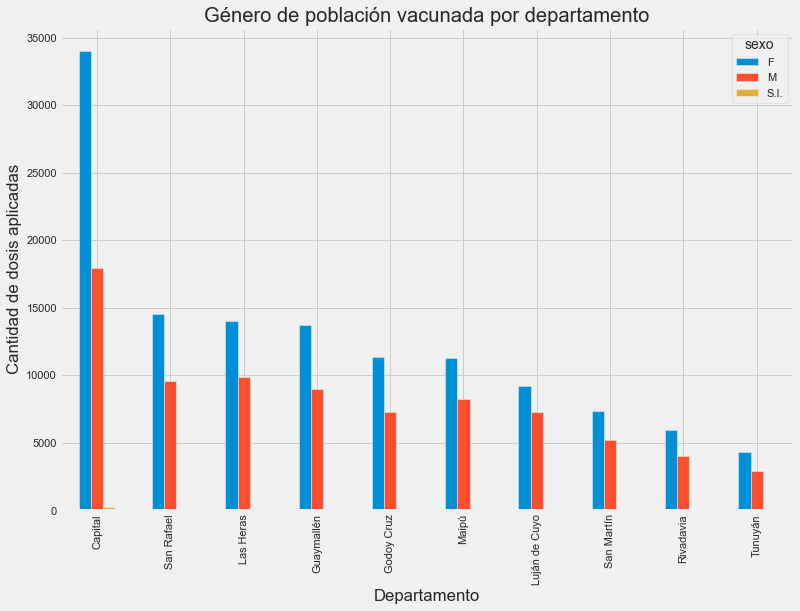

In [229]:
vacunas_mdz.groupby(['depto_aplicacion', 'sexo']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "F").head(10).plot.bar()
plt.title('Género de población vacunada por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de dosis aplicadas')
plt.show()

<p><font color= blue>Vacunación por grupo etario</font></p>

In [233]:
#Ordenados por masculino

vacunas_mdz.groupby(['depto_aplicacion', 'grupo_etario']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "60-69").head(10)

grupo_etario,18-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,>=100,S.I.
depto_aplicacion,,,,,,,,,,
Capital,3862,7545,8726,6687,9933,9604,4701,1085,17,3
Las Heras,225,964,1006,773,7793,9623,3196,409,7,6
Maipú,231,640,654,470,6322,8196,2790,304,4,1
Luján de Cuyo,96,244,330,238,5179,7418,2620,398,8,1
San Rafael,870,1863,2059,1538,5148,8775,3399,488,10,10
Guaymallén,834,1987,1686,1171,4985,8661,3055,421,7,4
San Martín,343,761,824,557,3587,4636,1660,185,2,1
Rivadavia,223,535,667,463,2853,3587,1495,194,0,0
Godoy Cruz,616,1838,1759,1125,2147,7928,2963,398,7,0


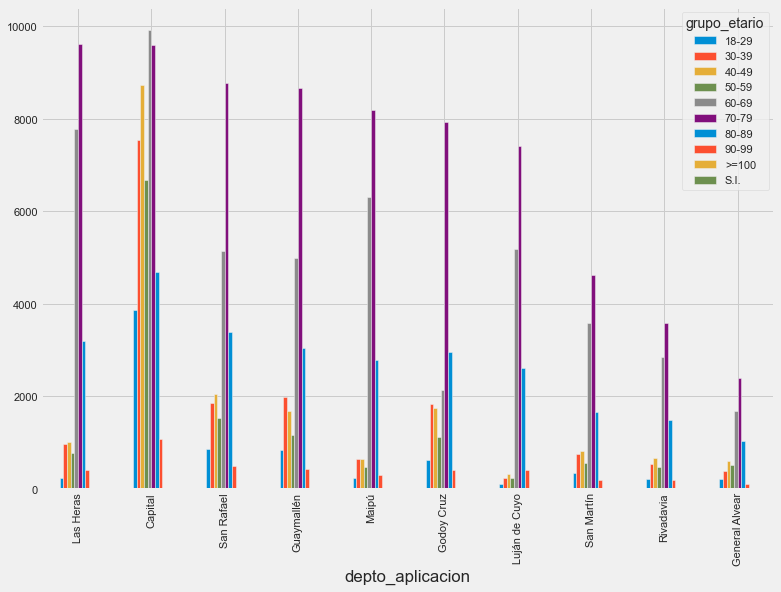

In [235]:
#Ordenados por masculino

vacunas_mdz.groupby(['depto_aplicacion', 'grupo_etario']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "70-79").head(10).plot.bar()

<p><font color= "blue">Vacunación por condición en cada departamento</font></p>

In [237]:
#Vacunación por condicion

vacunas_mdz.groupby(['depto_aplicacion', 'condicion_aplicacion']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = ">60").head(10)

condicion_aplicacion,>60,Estratégico,Otros,Riesgo,Salud
depto_aplicacion,,,,,
Capital,23140,9327,1,2314,17381
Las Heras,20256,345,1,5,3395
Maipú,17413,11,37,2,2149
San Rafael,17306,2181,0,407,4266
Guaymallén,16706,110,2,7,5986
Luján de Cuyo,15579,306,0,17,630
Godoy Cruz,13076,35,0,35,5635
San Martín,9859,203,0,0,2494
Rivadavia,7946,575,0,27,1469


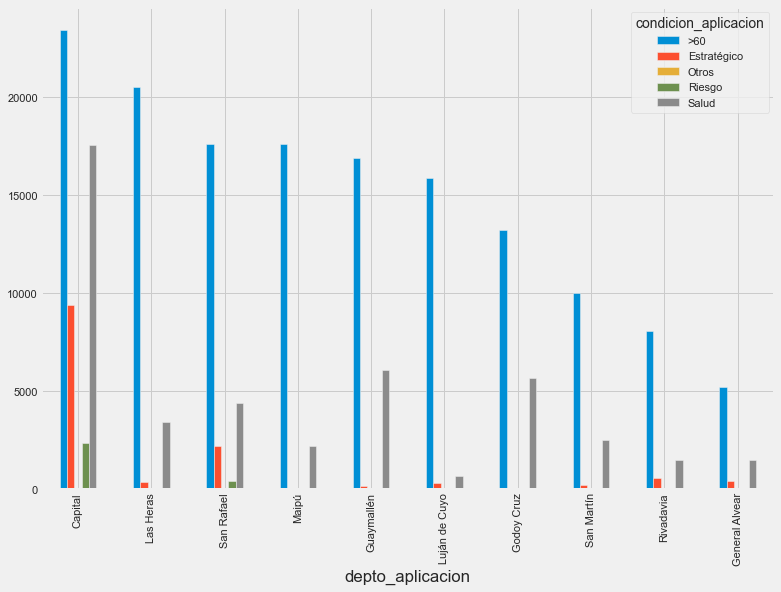

In [254]:
vacunas_mdz.groupby(['depto_aplicacion', 'condicion_aplicacion']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = ">60").head(10).plot.bar()

<p><font color="blue">Cantidad de dosis aplicada por persona</font></p>

In [268]:
vacunas_mdz.groupby(['depto_aplicacion','sexo','orden_dosis']).size().unstack(level=1, fill_value=0).to_csv('dosis_dpto.csv')


In [269]:
vacunas_mdz.groupby(['depto_aplicacion','sexo','orden_dosis']).size().unstack(level=1, fill_value=0)

sexo                              F      M  S.I.
depto_aplicacion orden_dosis                    
Capital          1            31265  16174   340
                 2             2986   1977    27
General Alvear   1             3574   2293    36
                 2              743    459     0
Godoy Cruz       1            10046   6507   132
                 2             1420    852    12
Guaymallén       1            11965   8146   150
                 2             1876    994    11
Junín            1             4003   2050    18
                 2              247    144     3
La Paz           1              846    588    10
                 2              207    135     3
Las Heras        1            13112   9397   148
                 2             1066    628     7
Lavalle          1             1882   1595    18
                 2              487    379     8
Luján de Cuyo    1             8586   6897   110
                 2              717    508     6
Maipú            1            10167   7699   105
                 2             1182    683     7
Malargüe         1             1742   1154    12
                 2              346    223     1
Rivadavia        1             5133   3546    66
                 2              835    557     1
San Carlos       1             2188   1570   187
                 2              489    404     6
San Martín       1             6210   4515    36
                 2             1193    748    11
San Rafael       1            12878   8492   113
                 2             1875   1283     7
Santa Rosa       1             1534   1189    13
                 2              464    387     9
Tunuyán          1             3605   2536    38
                 2              764    463     4
Tupungato        1             1513   1138    11
                 2              196    168     3